# <div align="center"><b> СБОРНЫЙ ПРОЕКТ №2. ПРОГНОЗ КОЭФФИЦИЕНТА ВОССТАНОВЛЕНИЯ ЗОЛОТА ИЗ ЗОЛОТОСОДЕРЖАЩЕЙ РУДЫ </b></div> 

**Цель**: подготовка прототипа модели машинного обучения для предсказания коэффициента восстановления золота из золотосодержащей руды.

**Заказчик**: компания "Цифра".

# 1. Подготовка данных

In [119]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [120]:
#снимем ограничение на количество столбцов датафрейма, выводимых на экран
pd.options.display.max_columns = None

## 1.1 Обзор данных

Напишем вспомогательную функцию, выводящую на экран ознакомительную информацию о датафрейме

In [121]:
#напишем функцию, импортирующую указанный датасет и отображающую основную информацию о данных
def data_info(relative_path):  #в формате '\имя_файла.csv'
    
    #импортируем данные в датафрейм
    try:
    # local machine
        path=r'C:\Users\vizum\Desktop\yandex_practicum\project_9\datasets'+relative_path
        df = pd.read_csv(path)
    except:
        #yandex practicum server
        df = pd.read_csv('/datasets'+relative_path)
            
            
    #выведем на экран первые пять строк датафрейма
    display('ПЕРВЫЕ ПЯТЬ СТРОК')
    display(df.head())
              
    #получим общую информацию о датафрейме
    display('ОБЩАЯ ИНФОРМАЦИЯ')
    display(df.info())
    
    #рассчитаем процент пропусков для каждого параметра
    display('ПРОЦЕНТ ПРОПУСКОВ')
    display(pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm'))
              
    #получим статистическую информацию о числовых данных
    display('СТАТИСТИКА О ЧИСЛОВЫХ ДАННЫХ')
    display(df.describe())
              
    #получим статистическую информацию о текстовых данных
    display('СТАТИСТИКА О ТЕКСТОВЫХ ДАННЫХ')
    display(df.describe(include = 'object'))  
              
    return df

### 1.1.1 Загрузка и обзор тренировочных данных

In [122]:
gr_train = data_info('/gold_recovery_train_new.csv')

'ПЕРВЫЕ ПЯТЬ СТРОК'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'ОБЩАЯ ИНФОРМАЦИЯ'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

'ПРОЦЕНТ ПРОПУСКОВ'

,0
date,0.000000
final.output.concentrate_ag,0.010000
final.output.concentrate_pb,0.010000
final.output.concentrate_sol,1.490000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.000000
final.output.tail_pb,0.710000
final.output.tail_sol,0.040000
final.output.tail_au,0.000000


'СТАТИСТИКА О ЧИСЛОВЫХ ДАННЫХ'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

'СТАТИСТИКА О ТЕКСТОВЫХ ДАННЫХ'

,date
count,14149
unique,14149
top,2017-06-22 18:59:59
freq,1


В тренировочном датасете gr_train 14149 строк и 87 столбцов. Максимальное количество пропусков - 11.34% наблюдается в столбце `secondary_cleaner.output.tail_sol`. Для остальных столбцов количество пропусков не превышает 5%. Кроме того, в столбцах с информацией о концентрации веществ на разных стадиях очистки и в хвостах присутствуют нули, которые могут быть выбросами.

### 1.1.2 Загрузка и обзор тестовых данных

In [123]:
gr_test = data_info('/gold_recovery_test_new.csv')

'ПЕРВЫЕ ПЯТЬ СТРОК'

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

'ОБЩАЯ ИНФОРМАЦИЯ'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

'ПРОЦЕНТ ПРОПУСКОВ'

,0
date,0.000000
primary_cleaner.input.sulfate,0.080000
primary_cleaner.input.depressant,0.090000
primary_cleaner.input.feed_size,0.000000
primary_cleaner.input.xanthate,0.080000
primary_cleaner.state.floatbank8_a_air,0.000000
primary_cleaner.state.floatbank8_a_level,0.000000
primary_cleaner.state.floatbank8_b_air,0.000000
primary_cleaner.state.floatbank8_b_level,0.000000
primary_cleaner.state.floatbank8_c_air,0.000000


'СТАТИСТИКА О ЧИСЛОВЫХ ДАННЫХ'

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

'СТАТИСТИКА О ТЕКСТОВЫХ ДАННЫХ'

,date
count,5290
unique,5290
top,2016-11-13 04:59:59
freq,1


В тестовом датасете gr_test 5290 строк и 53 столбца. Максимальное количество пропусков не превышает 0.5%. Посмотрии, какие столбцы не вошли в тестовую выборку:

In [124]:
train_columns = list(gr_train.columns)
test_columns = list(gr_test.columns)
columns_not_in_test = []
for col in train_columns:
    if col not in test_columns:
        columns_not_in_test.append(col)
columns_not_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

### 1.1.3 Загрузка и обзор полного датафрейма

In [125]:
gr_full = data_info('/gold_recovery_full_new.csv')

'ПЕРВЫЕ ПЯТЬ СТРОК'

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

'ОБЩАЯ ИНФОРМАЦИЯ'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

'ПРОЦЕНТ ПРОПУСКОВ'

,0
date,0.000000
final.output.concentrate_ag,0.010000
final.output.concentrate_pb,0.010000
final.output.concentrate_sol,1.090000
final.output.concentrate_au,0.000000
final.output.recovery,0.000000
final.output.tail_ag,0.010000
final.output.tail_pb,0.520000
final.output.tail_sol,0.030000
final.output.tail_au,0.000000


'СТАТИСТИКА О ЧИСЛОВЫХ ДАННЫХ'

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

'СТАТИСТИКА О ТЕКСТОВЫХ ДАННЫХ'

,date
count,19439
unique,19439
top,2016-03-09 13:00:00
freq,1


В датасете gr_full с исходными данными 19439 строк и 87 колонок. Максимальное количество пропусков - 8.99% наблюдается в столбце `secondary_cleaner.output.tail_sol`. Как и в тренировочном датасете, в полном датасете присутствуют нули в столбцах, описывающих концентрацию веществ в концентрате и хвостах на разных стадиях очистки. Отрицательных значений концентраций не наблюдается, что уже радует :)

## 1.2 Проверка корректности расчета эффективности обогащения

Проверим корректности расчета эффективности обогащения. Вычислим эффективность на обучающей выборке для признака `rougher.output.recovery` и найдем MAE между расчетами и исходным значением признака. Формула дла расчета эффективности обогащения (recovery):

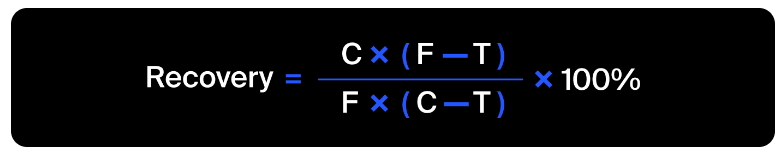

- C - доля золота в концентрате после флотации/очистки;
- F - доля золота в сырье/концентрате до флотации/очистки;
- Т - доля золота в отвальных хвостах после флотации/очистки.

Напишем функцию, осуществляющую расчет recovery.

In [126]:
def recovery_count(row, stage):
    f = row[stage + '.input.feed_au']
    c = row[stage + '.output.concentrate_au']
    t = row[stage + '.output.tail_au']
    recovery = c*(f-t)/(f*(c-t))*100
    return recovery

In [127]:
#рассчитаем коэффициент восстановления золота
gr_train['check_rougher_recovery'] = gr_train.apply(lambda x: recovery_count(x, 'rougher'), axis=1)
gr_train.loc[:, ['rougher.output.recovery', 'check_rougher_recovery']]

,rougher.output.recovery,check_rougher_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


In [128]:
#оценим точность расчетов
mean_absolute_error(gr_train['check_rougher_recovery'], gr_train['rougher.output.recovery'])

9.73512347450521e-15

Значение МАЕ очень мало, что говорит о корректности расчета эффективности обогащения в тренировочном датасете.

## 1.3 Признаки, недоступные в тестовой выборке

In [129]:
#выведем на экран список признаков, отсутствующих в тестовой выборке (сформирован при обзоре тестовой выборки)
columns_not_in_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Признаки, недоступные в тестовой выборке, относятся к показателям, полученными в результате проведения процесса очистки и расчетным параметрам: концентрации веществ в хвостах и концентратах после флотации и двух стадий очистки, а также к расчетным количествам флотационных реагентов. Для обучения модели эти данные не требуются во избежание утечки целевого признака.

## 1.4 Предобработка данных


Рассчитаем количество полных дубликатов в датафреймах.

In [130]:
for df in [gr_train, gr_test, gr_full]:
    display(df.duplicated().sum())

0

0

0

В задании на проект указано, что соседние по времени параметры часто похожи. Заполним пропуски соседними значениями.

In [131]:
#заполним пропуски в тестовой и обучающей выборках
gr_test = gr_test.fillna(method='ffill')
gr_train = gr_train.fillna(method='ffill')
gr_full = gr_full.fillna(method='ffill')

In [132]:
#проверим результат
print('Осталось пропусков в тренировочной выборке:', gr_train.isna().sum().sum())
print('Осталось пропусков в тестовой выборке:', gr_test.isna().sum().sum())
print('Осталось пропусков в полной выборке:', gr_test.isna().sum().sum())

Осталось пропусков в тренировочной выборке: 0
Осталось пропусков в тестовой выборке: 0
Осталось пропусков в полной выборке: 0


Посмотрим на характер распределения нулей в тренировочной выборке. Теоретически, поданное на обработку сырье может быть пустым, однако ситуация, в которой на начальной или промежуточной стадии обработки концентрация вещества равна нулю, а финальная концентрация или концентрация на следующем этапе обработки отлична от нуля, невозможна. Посмотрим, сколько нулевых значений на разных стадиях обработки сырья.

In [133]:
#напишем вспомогательную функцию - она понадобится нам несколько раз
def zero_count():
    for stage in ['rougher.input.feed_', 'rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
        for subst in ['au', 'ag', 'pb', 'sol']:
            print('Количество нулевых значений концентрации '+subst+' в '+stage+':', gr_train.loc[gr_train[stage+subst]==0]['date'].count()) 
    return

zero_count()

Количество нулевых значений концентрации au в rougher.input.feed_: 0
Количество нулевых значений концентрации ag в rougher.input.feed_: 0
Количество нулевых значений концентрации pb в rougher.input.feed_: 0
Количество нулевых значений концентрации sol в rougher.input.feed_: 0
Количество нулевых значений концентрации au в rougher.output.concentrate_: 297
Количество нулевых значений концентрации ag в rougher.output.concentrate_: 297
Количество нулевых значений концентрации pb в rougher.output.concentrate_: 297
Количество нулевых значений концентрации sol в rougher.output.concentrate_: 300
Количество нулевых значений концентрации au в primary_cleaner.output.concentrate_: 74
Количество нулевых значений концентрации ag в primary_cleaner.output.concentrate_: 74
Количество нулевых значений концентрации pb в primary_cleaner.output.concentrate_: 79
Количество нулевых значений концентрации sol в primary_cleaner.output.concentrate_: 80
Количество нулевых значений концентрации au в final.output.co

Среди всех случаев в датафрейме на вход обогатительной установки ни разу не подали сырье, в котором концентрация хотя бы одного вещества равна нулю. Количество нулевых значений концентраций в черновом концентрате практически в четыре раза больше, чем в концентрате после первичной очистки и в пять - после вторичной очистки. Это невозможно. Уберем неправдоподобные данные из датасета.

In [134]:
stages = ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']
for i in range(len(stages)-1):
    for subst in ['au', 'ag', 'pb', 'sol']:
        gr_train = gr_train[~((gr_train[stages[i]+subst]==0)&(gr_train[stages[i+1]+subst]>0))]

zero_count()
    

Количество нулевых значений концентрации au в rougher.input.feed_: 0
Количество нулевых значений концентрации ag в rougher.input.feed_: 0
Количество нулевых значений концентрации pb в rougher.input.feed_: 0
Количество нулевых значений концентрации sol в rougher.input.feed_: 0
Количество нулевых значений концентрации au в rougher.output.concentrate_: 1
Количество нулевых значений концентрации ag в rougher.output.concentrate_: 1
Количество нулевых значений концентрации pb в rougher.output.concentrate_: 1
Количество нулевых значений концентрации sol в rougher.output.concentrate_: 1
Количество нулевых значений концентрации au в primary_cleaner.output.concentrate_: 2
Количество нулевых значений концентрации ag в primary_cleaner.output.concentrate_: 2
Количество нулевых значений концентрации pb в primary_cleaner.output.concentrate_: 2
Количество нулевых значений концентрации sol в primary_cleaner.output.concentrate_: 2
Количество нулевых значений концентрации au в final.output.concentrate_: 

Теперь количество нулевых концентраций выглядит более правдоподобно.

# 2. Анализ данных

## 2.1 Анализ изменения концентраций металлов после разных стадий очистки

Рассмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Рассмотрим концентрацию металлов как в полезном концентрате, так и в хвостах. Напишем вспомогательную функцию и на тренировочном датасете определим концентрации металлов на разных этапах очистки.

In [135]:
def metal_quantity_dens(df, product, metal): #product = concentrate or tail, metal = au, pg or pb
    
    #сформируем окончание названия столбца
    path = product+'_'+metal
    
    #создадим поле для творчества :)
    plt.figure(figsize=(19,10), dpi= 80) 
    
    #построим графики плотности распределения значений
    sns.kdeplot(df['rougher.input.feed_' + metal], color ='palegreen', shade=True, alpha=0.5, edgecolor='darkslategray')
    sns.kdeplot(df['rougher.output.' + path], color ='aquamarine', shade=True, alpha=0.5, edgecolor='darkslategray')
    sns.kdeplot(df['primary_cleaner.output.' + path], color ='turquoise', shade=True, alpha=0.5, edgecolor='darkslategray')    
    sns.kdeplot(df['final.output.' + path], color ='teal', shade=True, alpha=0.5, edgecolor='darkslategray')   
    
    #настроим сетку
    plt.minorticks_on()
    plt.grid(which='major')
    plt.grid(which='minor', linestyle=':')

    #Добавим подписи и отобразим результат
    plt.title('Концентрация '+metal+', ' + product, fontsize=17)
    plt.legend(['Сырье', 'Грубая очистка', 'Первичная очистка', 'Вторичная очистка'])
    plt.xlabel('Концентрация', fontsize=15)
    plt.ylabel('Количество случаев', fontsize=15);
    plt.show()  

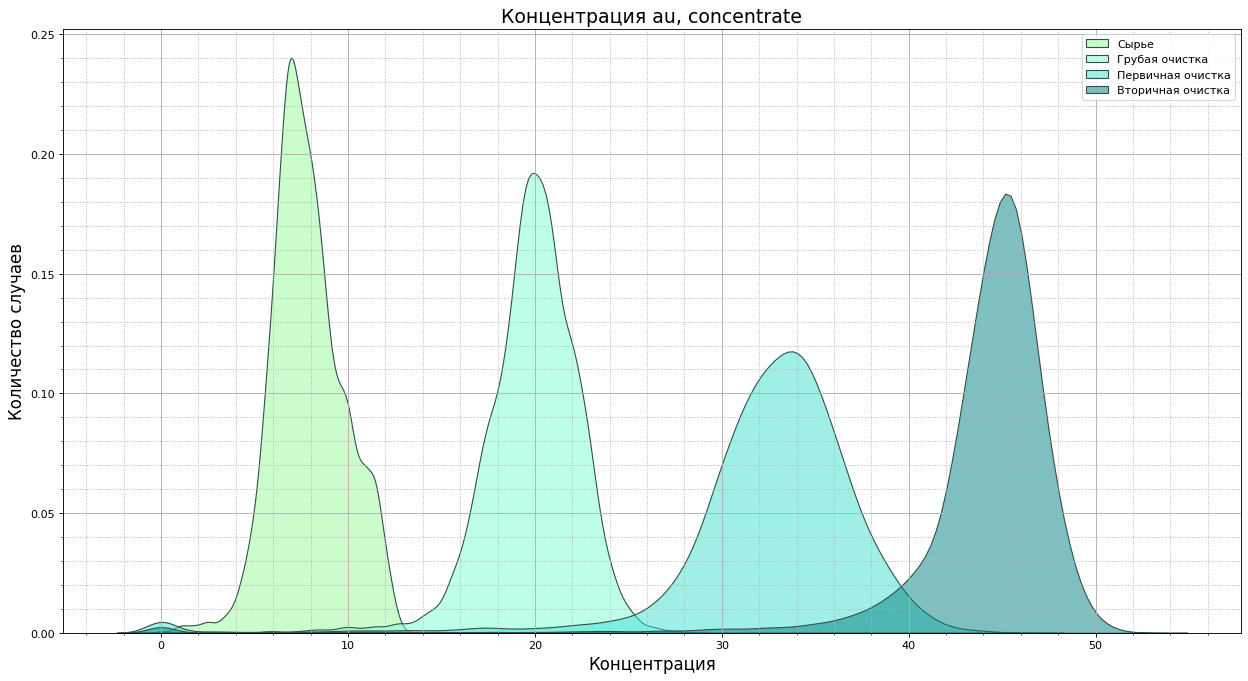

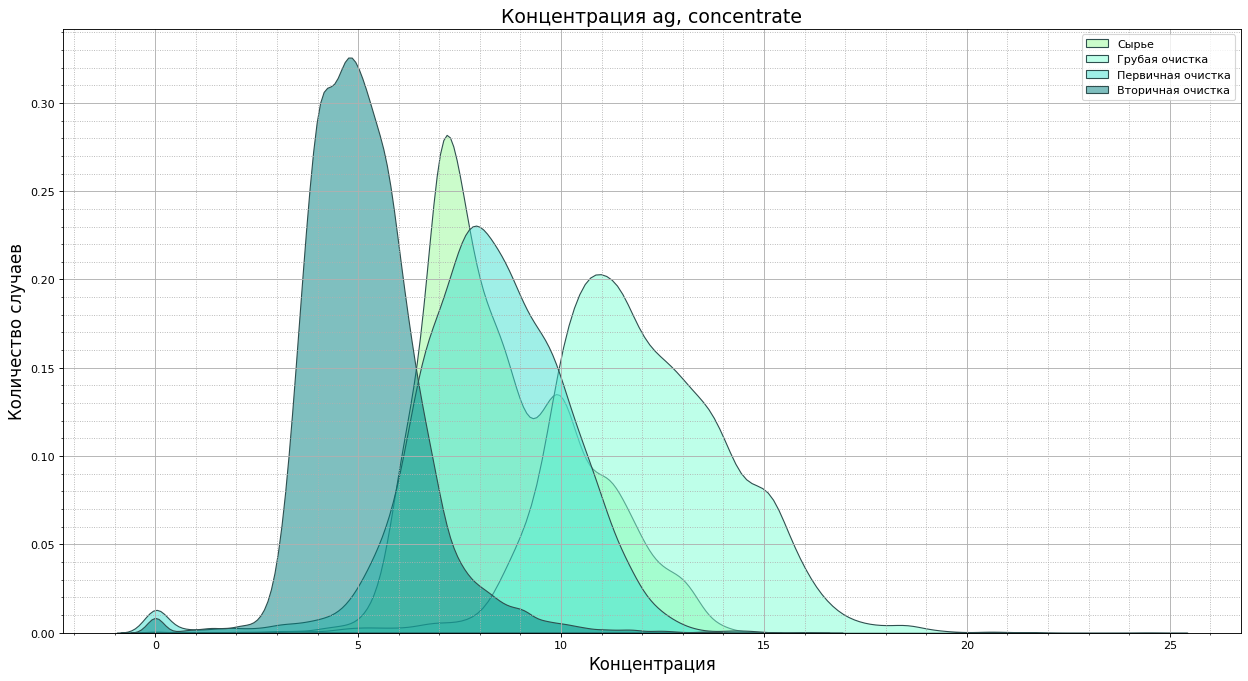

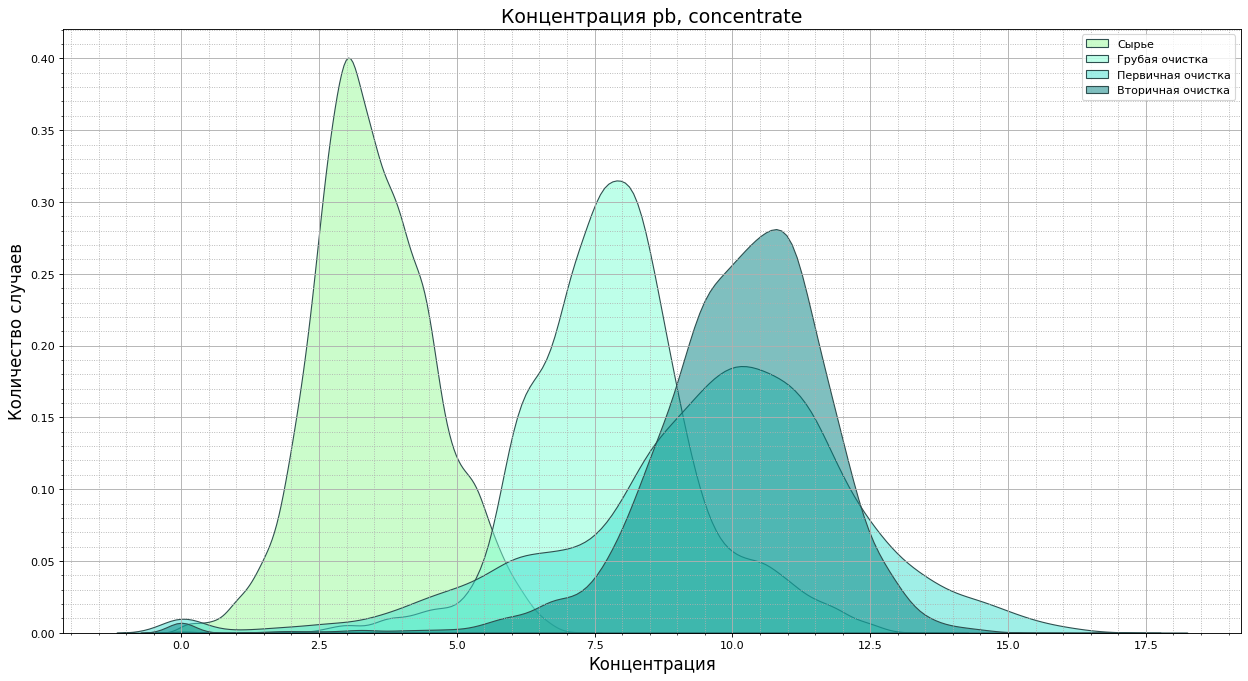

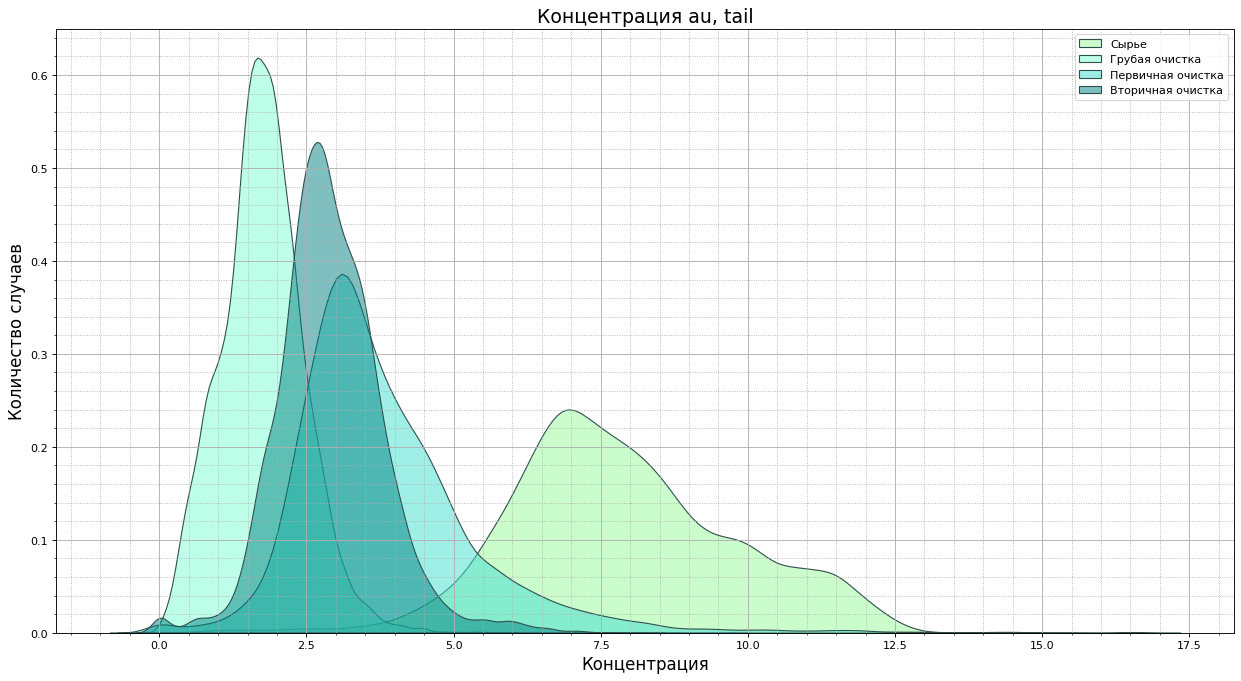

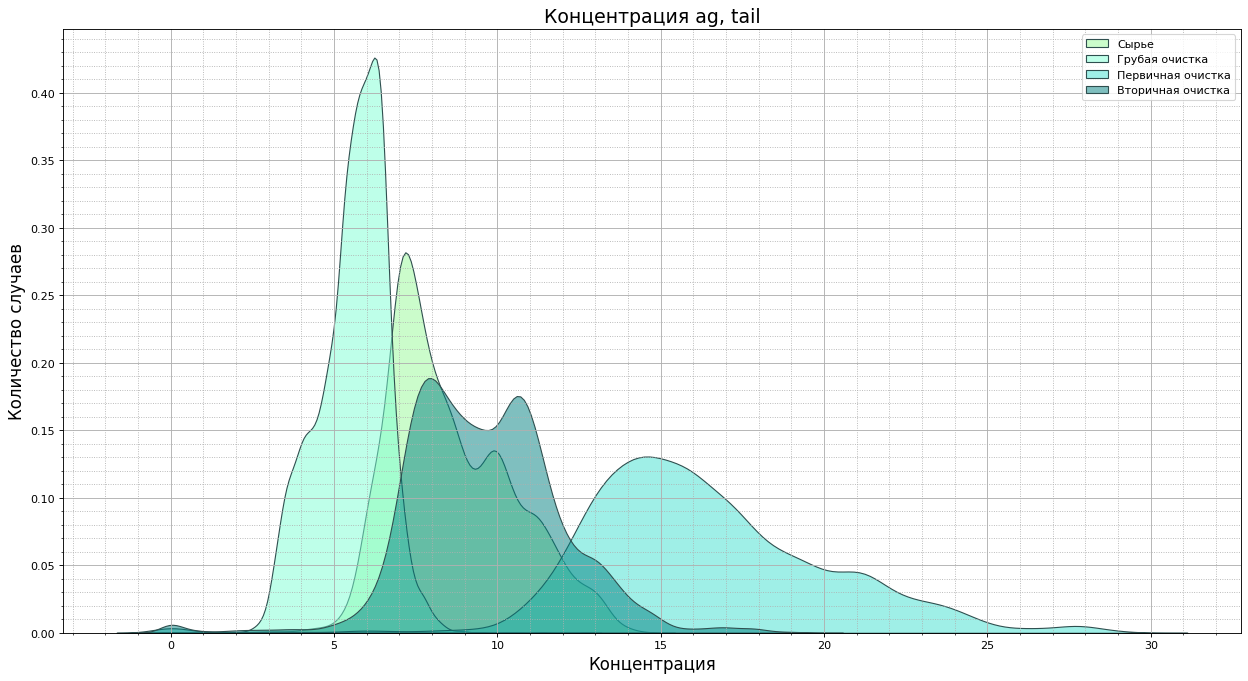

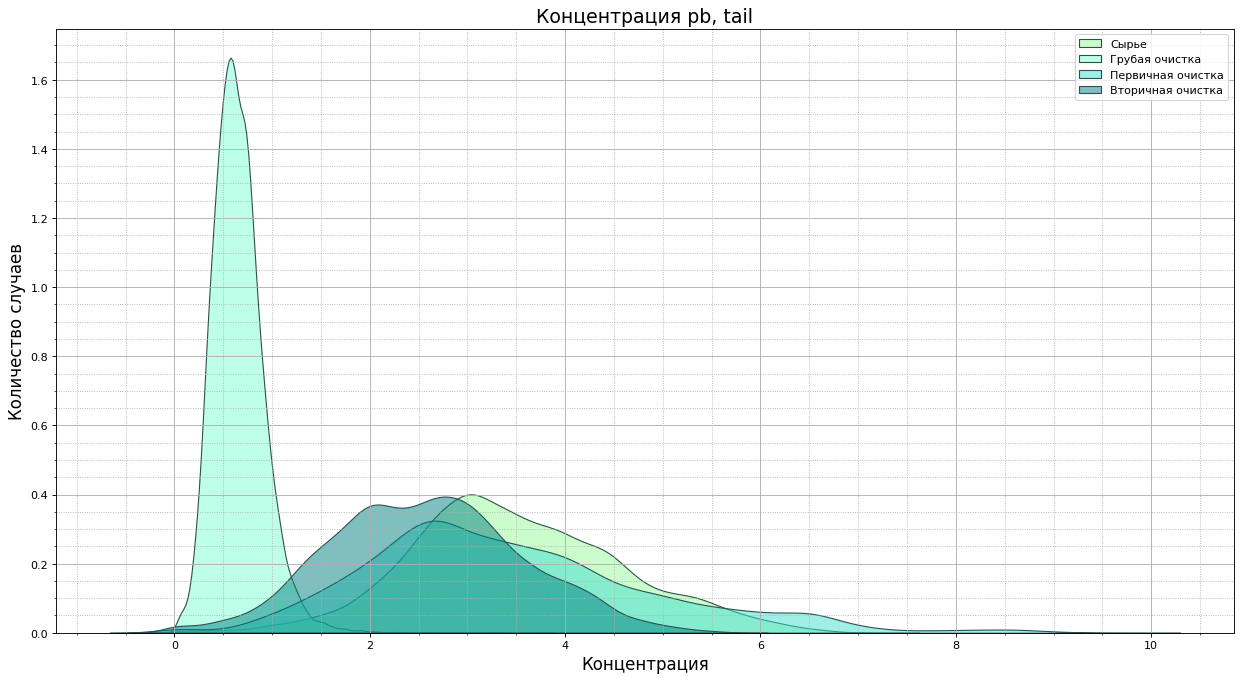

In [136]:
#рассмотрим количество металлов в полезном концентрате и хвостах
for product in ['concentrate', 'tail']:
    for me in ['au', 'ag', 'pb']:
        metal_quantity_dens(gr_train, product, me)

Графики плотности распределения концентраций веществ в черновом, финальном и промежуточном концентратах имеют вид нормального распределения, однако имеют локальные пики вблизи нулевых значений. Очистим данные от значений, соответствующих указанным локальным пикам и пострим графики плостности распределения значений концентраций веществ заново.

In [137]:
print('Количество строк до очистки:', gr_train.shape[0])

Количество строк до очистки: 13774


In [138]:
low_limits = [2, 1, 1]
for i, me in enumerate(['au', 'ag', 'pb']):
    for stage in ['rougher.output.concentrate_', 'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
        gr_train = gr_train[gr_train[stage+me]>low_limits[i]]

In [139]:
print('Количество строк после очистки:', gr_train.shape[0])

Количество строк после очистки: 13552


Удалено 2% значений.

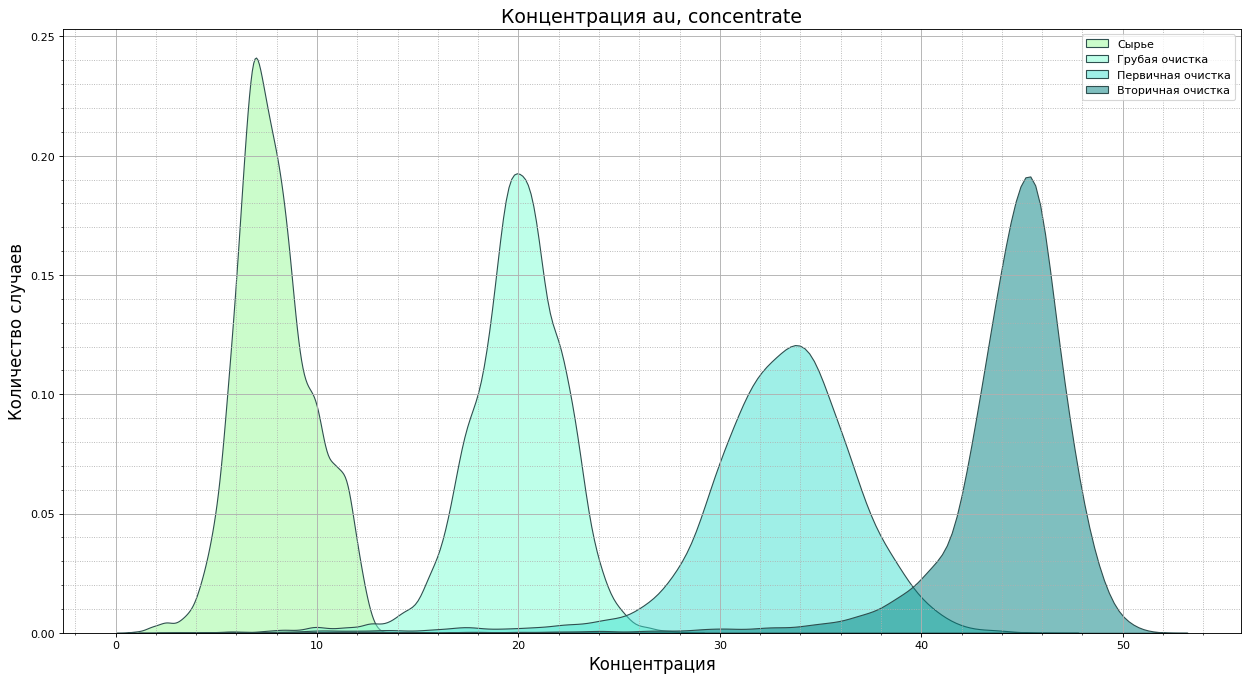

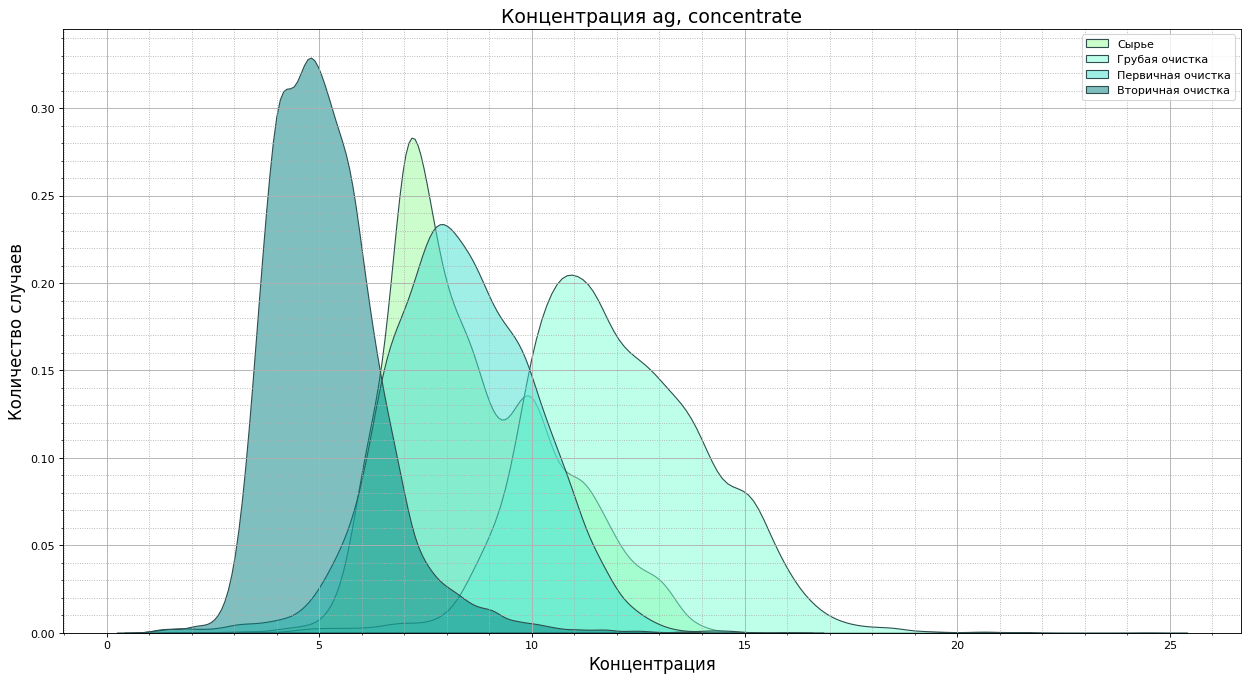

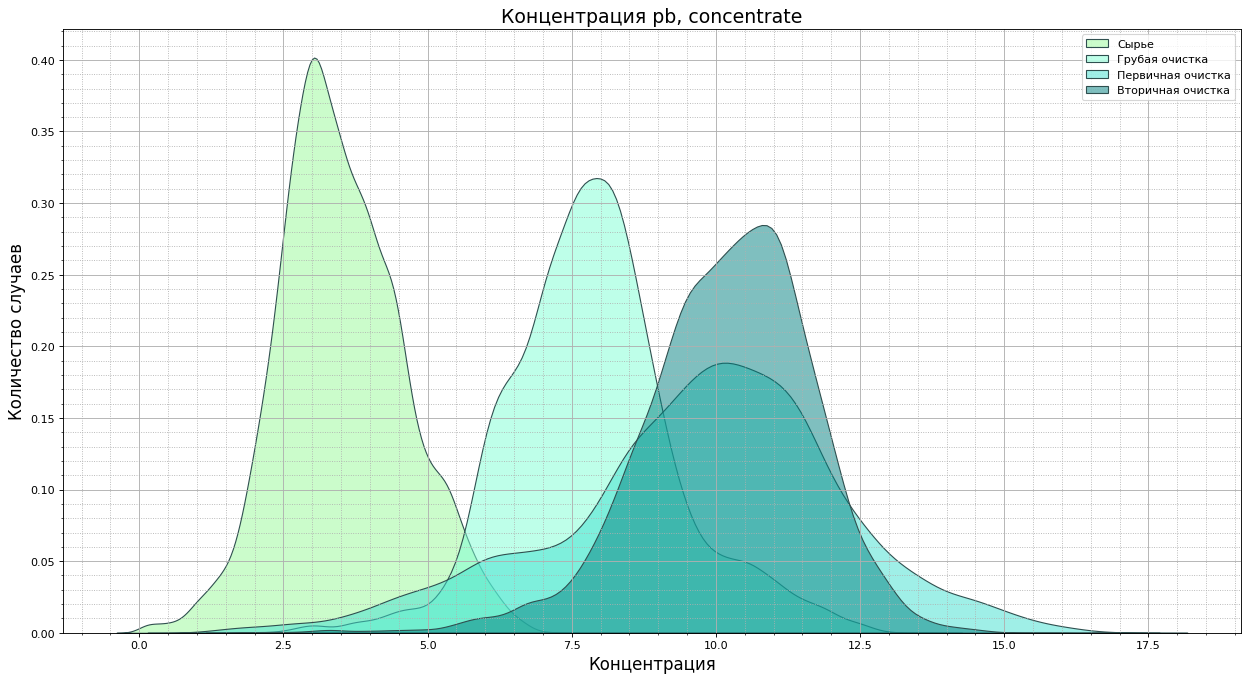

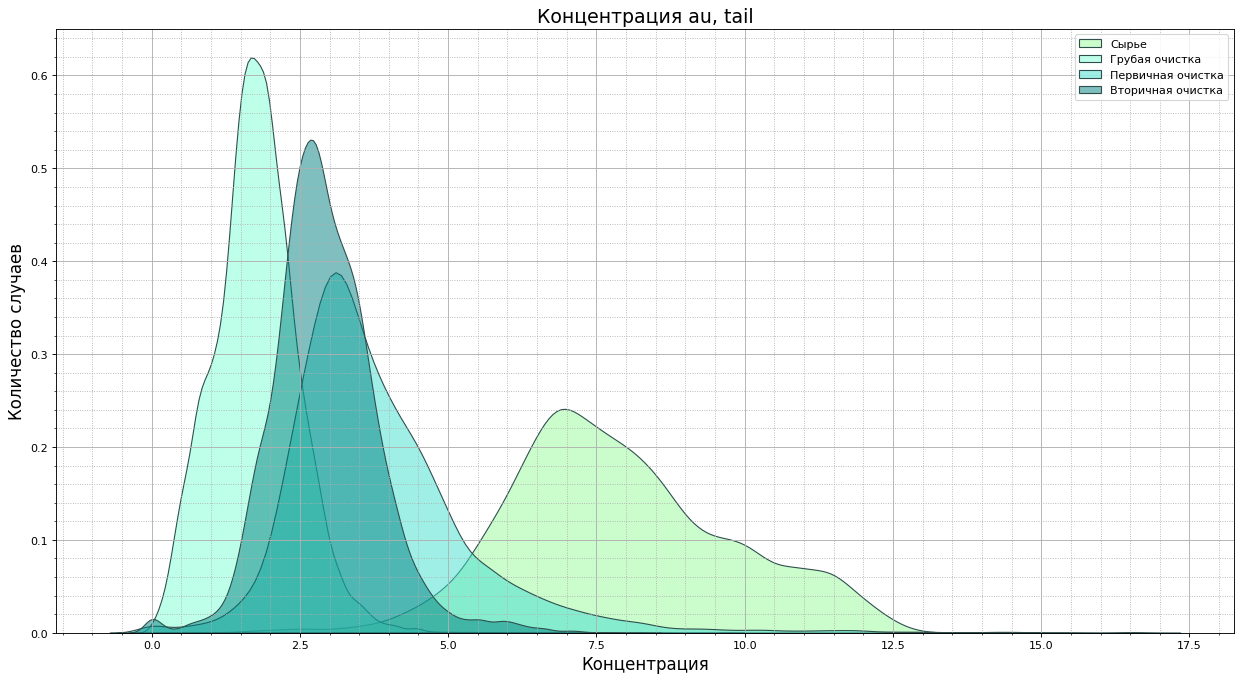

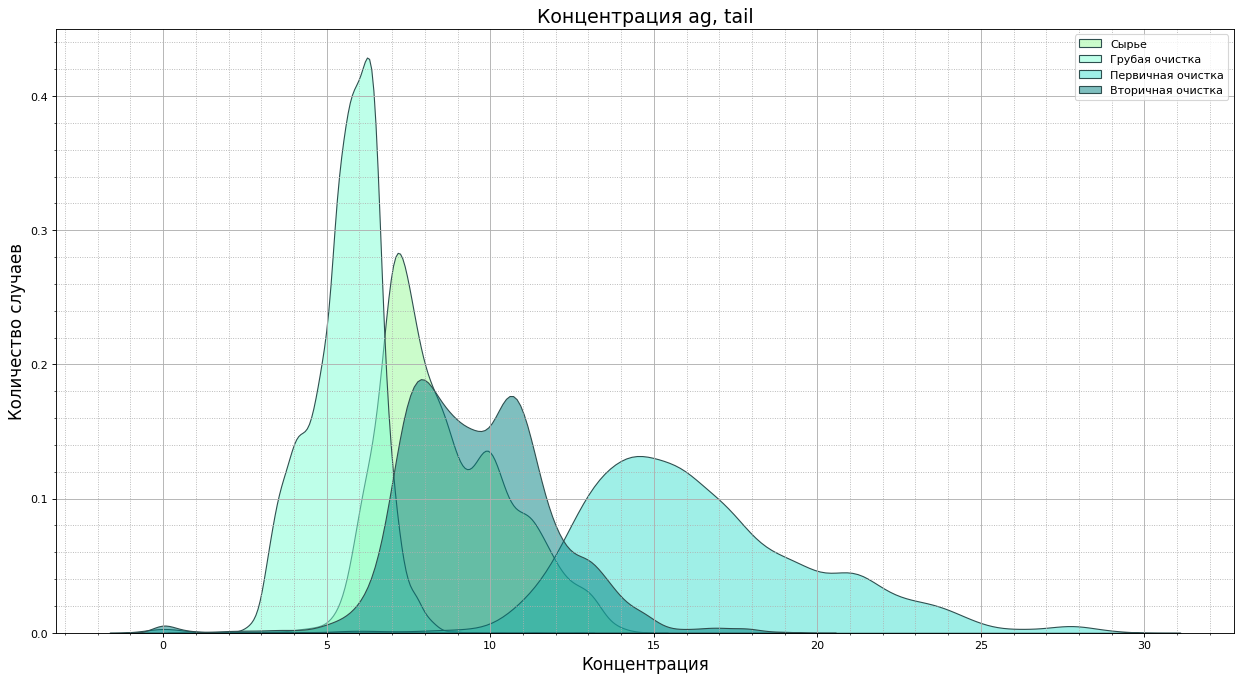

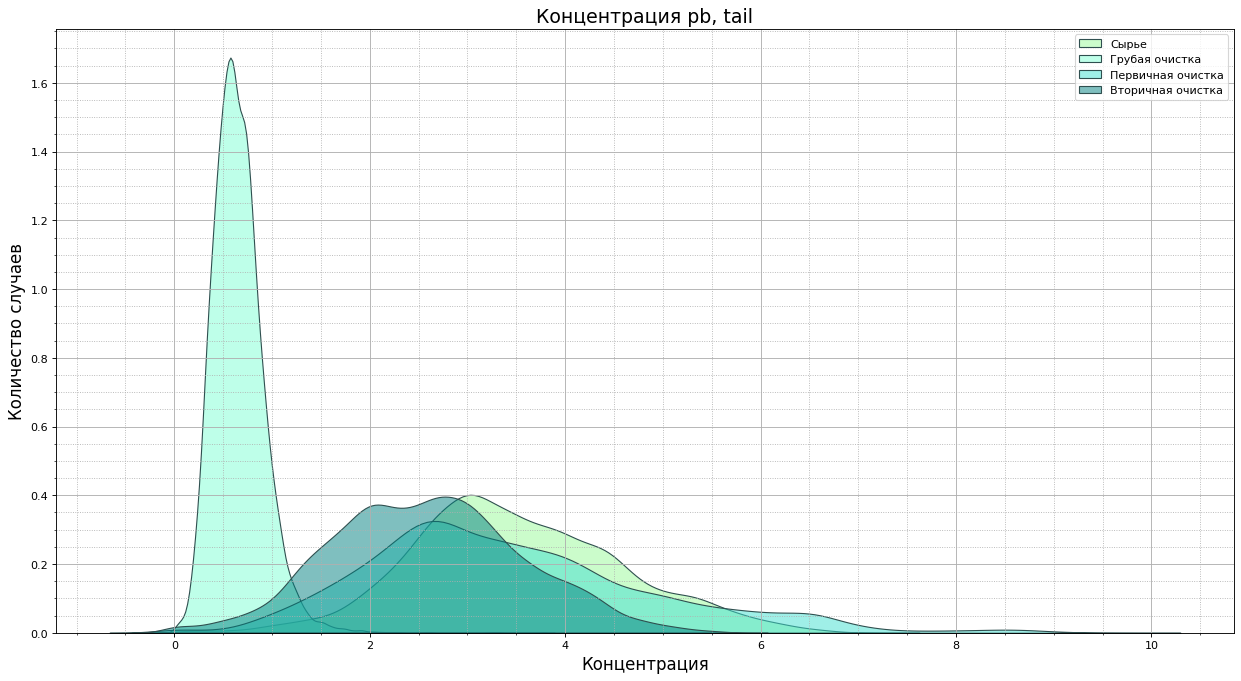

In [140]:
#повторно рассмотрим количество металлов в полезном концентрате и хвостах
for product in ['concentrate', 'tail']:
    for me in ['au', 'ag', 'pb']:
        metal_quantity_dens(gr_train, product, me)

Локальные пики возле нуля в концентратах исчезли. Рассчитаем средние значения концентраций веществ на разных стадиях и построим столбчатую диаграмму.

In [141]:
metal_mean = {'metal':['au', 'ag', 'pb'], 'feed':[], 'rougher':[], 'primary_cleaner':[], 'final':[]}
for stage in ['rougher', 'primary_cleaner', 'final']:
    for me in ['au', 'ag', 'pb']:
        metal_mean[stage].append(round(gr_train[stage+'.output.concentrate_'+me].mean(), 2))
for me in ['au', 'ag', 'pb']:
        metal_mean['feed'].append(round(gr_train['rougher.input.feed_'+me].mean(), 2))    
        
metal_mean = pd.DataFrame(metal_mean)
metal_mean

,metal,feed,rougher,primary_cleaner,final
0,au,7.88,19.90,32.88,44.24
1,ag,8.58,12.03,8.34,5.17
2,pb,3.51,7.84,9.71,10.20


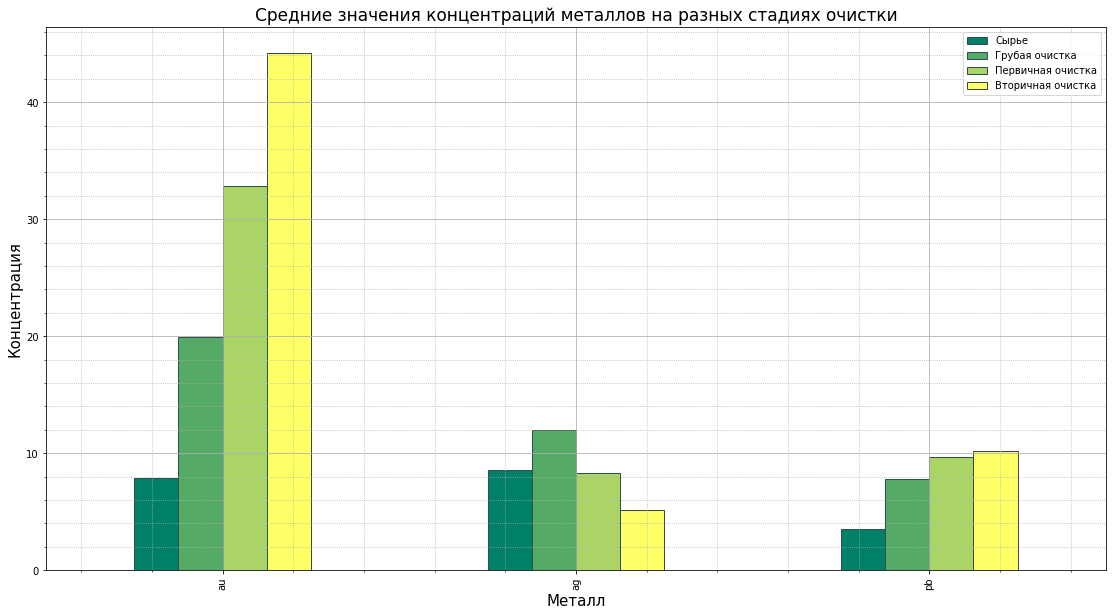

In [142]:
metal_mean.plot(kind='bar', x='metal', colormap='summer', figsize=(19, 10), edgecolor='darkslategray')

#настроим сетку
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

#добавим элементы оформления
plt.title('Средние значения концентраций металлов на разных стадиях очистки', fontsize=17)
plt.legend(['Сырье', 'Грубая очистка', 'Первичная очистка', 'Вторичная очистка'])
plt.xlabel('Металл', fontsize=15)
plt.ylabel('Концентрация', fontsize=15);
#plt.show()  

Анализируя полученные графики и средние значения концентраций металлов на разных стадиях очистки, можно сказать следующее:
- на каждой стадии очистки концентрация золота увеличивается на ~12%. Средняя концентрация золота в финальном концентрате превышает аналогичный показатель в сырье в 5.6 раз и составляет 44%. График плотности распределения концентрации золота после второй стадии очистки показывает, что максимальная достигнутая концентрация золота не превышает 53%, что подтверждается статистической информацией из обзора данных;
- после флотации концентрация серебра увеличивается на 3.5% относительно концентрации в сырье, однако на каждой последующей стадии очистки снижается на ~3-4%. Концентрация серебра в сырье - 8.6% , в черновом концентрате - 12.0%, в финальном концентрате - 5.2%;
- количество свинца в сырье составляет 3.5%, в черновом концентрате - 7.8%. После первичной очистки количество свинца увеличивается до 9.7%, однако после вторичной очистки увеличивается незначительно - всего лишь на 0.5% и достигает 10.2%.
- концентрации веществ в концентратах имеют ярко выраженное нормальное распределение (исключение - графики для серебра с несколькими пиками). Для золота разброс значений в финальном концентрате меньше, чем в предыдущих концентратах, о чем говорит более узкий пик графика. Вероятнее всего, концентрация золота в финальном концентрате будет варьироваться в пределах от 42 до 48%. Для серебра графики скошены вправо и, как и для золота, разброс значений количества серебра в финальном концентрате меньше, чем для предыдущих концентратов. Кроме того,на графике концентрации серебра в финальном концентрате и в сырье наблюдается локальный пик вблизи основного пика.  Для свинца разброс значений в финальном и черновом концентрате примерно одинаков и меньше, чем в концентрате после первичной очистки;

- концентрация веществ в отвальных хвостах также имеет нормальное распределение, однако наблюдаются и аномалии: так, графики плотности распределения концентраций для свинца и серебра после последней стадии очистки имеют по два пика. Для золота минимальный разброс в хвосте наблюдается после вторичной очистки, для свинца и серебра - после флотации.

## 2.2 Анализ распределения размеров гранул сырья в тренировочной и тестовой выборках

Проведем анализ распределения размеров гранул сырья в тренировочной и тестовой выборках. Построим гистограммы плотности распределения веществ и сравним их.

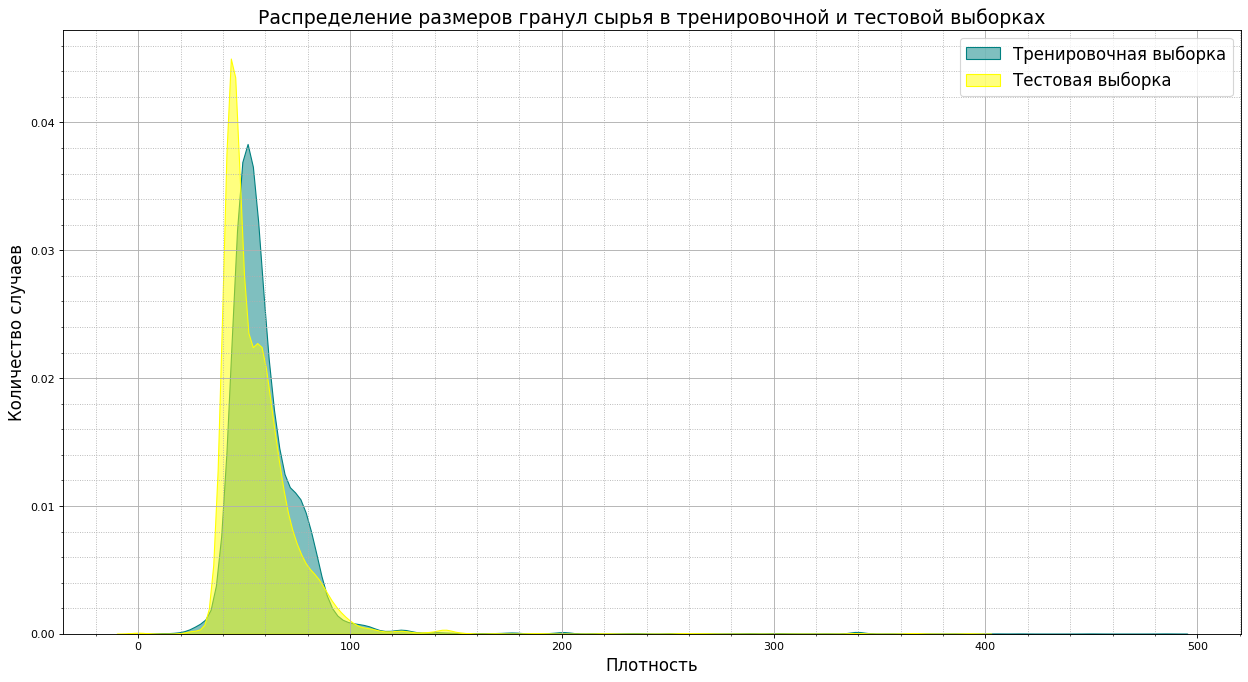

In [143]:
#создадим поле для творчества :)
plt.figure(figsize=(19,10), dpi= 80) 
    
#построим графики плотности
sns.kdeplot(gr_train['rougher.input.feed_size'], color ='teal', shade=True, alpha=0.5)
sns.kdeplot(gr_test['rougher.input.feed_size'], color='yellow', shade=True, alpha=0.5)

#настроим сетку
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

#Добавим подписи и отобразим результат
plt.title('Распределение размеров гранул сырья в тренировочной и тестовой выборках', fontsize=17)
plt.legend(['Тренировочная выборка', 'Тестовая выборка'], fontsize=15)
plt.xlabel('Плотность', fontsize=15)
plt.ylabel('Количество случаев', fontsize=15);
plt.show()  

Гистограммы плотностей размеров гранул сырья в тренировосной и тестовой выборке очень похожи и имеют близкий разброс значений. Основные значения размеров гранул для тестовой и тренировочной выборок лежат в пределах от 20 до 120. Разница между пиками гистограмм составляет около 10, что составляет ~10% от интервала основных значений. Рассчитаем средние и медианные значения гранул сырья для тестовой и тренировочной выборок

In [144]:
print('Тренировочная выборка, среднее:', round(gr_train['rougher.input.feed_size'].mean(), 2))
print('Тренировочная выборка, среднее:', round(gr_test['rougher.input.feed_size'].mean(), 2))
print('Разность средних:', round(gr_train['rougher.input.feed_size'].mean()-gr_test['rougher.input.feed_size'].mean(),2))

Тренировочная выборка, среднее: 60.23
Тренировочная выборка, среднее: 55.95
Разность средних: 4.28


In [145]:
print('Тренировочная выборка, медиана:', round(gr_train['rougher.input.feed_size'].median(), 2))
print('Тренировочная выборка, медиана:', round(gr_test['rougher.input.feed_size'].median(), 2))
print('Разность медиан:', round(gr_train['rougher.input.feed_size'].median()-gr_test['rougher.input.feed_size'].median(),2))

Тренировочная выборка, медиана: 55.27
Тренировочная выборка, медиана: 50.85
Разность медиан: 4.42


Средние значения больше медианных на 5 единиц, однако разница между характеристиками положения не превышает 4.5, что составляет 4.5% от интервала основных значений размеров гранул сырья.

## 2.3 Исследование суммарной концентрации веществ на разных стадиях

На текущем этапе требуется исследовать суммарную концентрацию веществ на разных стадиях: в сырье, в черновом и финальных концентратах. К веществам, обозначенным в концентратах в тренировочной выборке относятся: ag, pb, sol, au.

In [146]:
#создадим пустой датафрейм, куда запишем суммарные концентрации веществ
substance_concentrate = {'feed':list(itertools.repeat(0, len(gr_train))), 'rougher':list(itertools.repeat(0, len(gr_train))), 'final':list(itertools.repeat(0, len(gr_train)))}
substance_concentrate = pd.DataFrame(substance_concentrate)
substance_concentrate

,feed,rougher,final
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
13547,0,0,0
13548,0,0,0
13549,0,0,0
13550,0,0,0


In [147]:
#просуммируем концентрации веществ на разных стадиях и сохраним их в созданном датафрейме
for subst in ['au', 'ag', 'pb', 'sol']:
    substance_concentrate['feed'] += gr_train['rougher.input.feed_'+subst]
    substance_concentrate['rougher'] += gr_train['rougher.output.concentrate_'+subst]
    substance_concentrate['final'] += gr_train['final.output.concentrate_'+subst]
    
substance_concentrate

,feed,rougher,final
0,51.680034,66.424950,63.644396
1,50.659114,67.012710,63.957723
2,50.609929,66.103793,64.311180
3,51.061546,65.752751,63.573449
4,47.859163,65.908382,64.004667
...,...,...,...
13547,52.762359,68.866535,67.433531
13548,52.529928,69.213055,67.920949
13549,52.380367,47.908690,67.724050
13550,52.050487,70.334979,67.760885


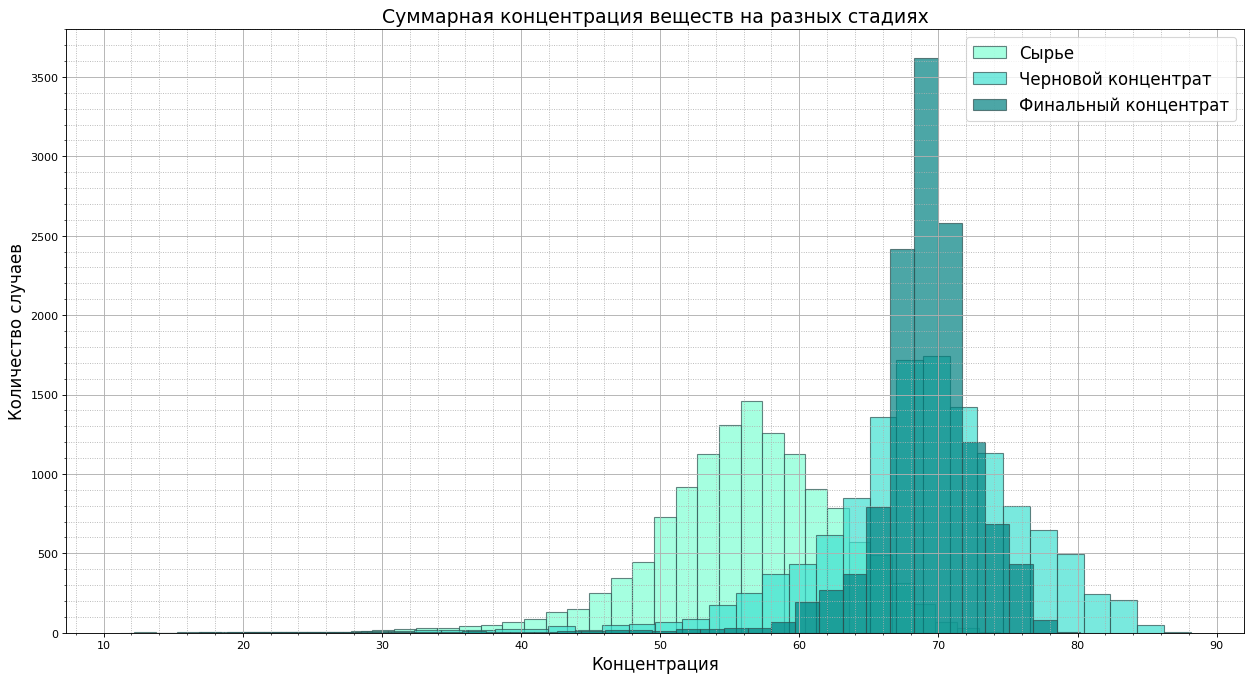

In [148]:
#построим гистограммы распределения концентраций веществ на разных стадиях
#создадим поле для творчества :)
plt.figure(figsize=(19,10), dpi= 80) 
    
#построим гистограммы распределения металлов на разных этапах очистки
substance_concentrate['feed'].plot(kind='hist', bins = 40, alpha = 0.7, edgecolor='darkslategray', color='aquamarine')
substance_concentrate['rougher'].plot(kind='hist', bins = 40, alpha = 0.7, edgecolor='darkslategray', color='turquoise')
substance_concentrate['final'].plot(kind='hist', bins = 40, alpha = 0.7, edgecolor='darkslategray', color='teal')
    
#настроим сетку
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

#Добавим подписи и отобразим результат
plt.title('Суммарная концентрация веществ на разных стадиях', fontsize=17)
plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат'], fontsize=15)
plt.xlabel('Концентрация', fontsize=15)
plt.ylabel('Количество случаев', fontsize=15);
plt.show()  

In [149]:
#рассчитаем медианные значений концентрации веществ на разных стадиях
substance_concentrate.median().reset_index()

,index,0
0,feed,56.547666
1,rougher,69.149312
2,final,69.244858


Анализируя полученные гистограммы распределения суммарной концентрации веществ в сырье, черновом и финальном центрате, можно сделать следующие **выводы**:
- все гистограммы имеют нормальное распределение и практически симметричны (исключение - локальные пики в интервале 0-3%);
- существенное увеличение концентрации веществ происходит после флотации: гистограмма распределения значений для чернового концентрата сдвинута относительно гистограммы для сырья на 12% вправо (медианное значение суммарной концентрации для сырья составляет 57%, для чернового концентрата - 69%). При этом величины разброса для концентрации веществ в сырье и черновом концентрате близки, исходя из ширины соответствующих гистограмм;
- первичная и вторичная стадии очистки не ведут к увеличению суммарной концентрации (даже напротив - в черновом концентрате встречаются значения концентраций выше, чем в финальном концентрате), однако ведут к увеличению случаев, когда концентрация веществ варьируется в пределах от 67 до 73% (72% от размера датафрейма). Гистограмма распределения суммарной концентрации веществ в финальном концентрате имеет ярко выраженный пик (от 67 до 73%) и меньший разброс по сравнению сырьем и черновым концентратом. Медианное значение суммарной концентрации веществ для финального концентрата такое же, как и для чернового концентрата - 69%.

# 3. Построение модели

## 3.1 Функция вычисления итоговой метрики sMAPE

Согласно заданию метрика sMAPE рассчитывается по формуле:
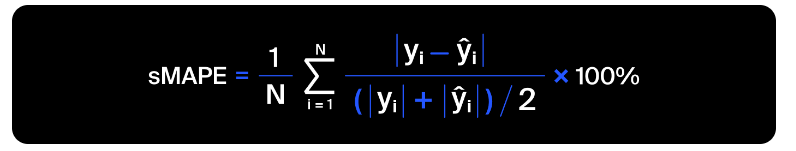

где:
- yi - истинное значение целевого признака i-го объекта; 
- ŷi - значение предсказания целевого признака i-го объекта;
- N - объем выборки (количество данных)

Итоговая sMAPE рассчитывается по формуле:
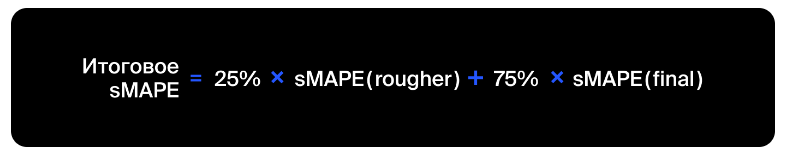

Напишем функции, реализующие расчет итоговой sMAPE. Учтем, что в знаменателе при вычислении sMAPE не должно быть нулевых значений.

In [150]:
def smape(predictions, target):
    smape = 0  
    for i in range(len(target)):
        if (abs(target[i])+abs(predictions[i])) != 0:
            smape = smape + 2*abs(target[i] - predictions[i])/(abs(target[i])+abs(predictions[i]))
        else:
            print('Деление на ноль! Индекс:', i)
            return
    smape = 100*smape/len(target)
    return smape

In [151]:
#проверим работу функции для расчета промежуточной sMAPE
pred = [11, -0.2, 14, 43]
targ = [14, -0.4, 12, 22]
smape(pred, targ)

42.666666666666664

Ответ верный, функция для расчета промежуточной sMAPE отработала корректно. Проверим при делении на 0:

In [152]:
smape([11, -0.2, 0, 43], [14, -0.4, 0, 22])

Деление на ноль! Индекс: 2


Отлично, ноль тоже нашли. Напишем функцию для расчета итоговой sMAPE:

In [153]:
def final_smape_2(predictions, targets):
    predictions_array = np.array(predictions)
    targets_array = np.array(targets)
    final_smape = 0.25*smape(predictions_array[:, 0], targets_array[:, 0])+0.75*smape(predictions_array[:, 1], targets_array[:, 1])
    return final_smape   

In [154]:
pred_f = [142, 0.27, 45, -3]
targ_f = [140, 0.01, 47, -5.6]

pr = pd.DataFrame({'r':pred, 'f':pred_f})
tar = pd.DataFrame({'r':targ, 'f':targ_f})

In [155]:
final_smape_2(pr, tar)

57.90647937853367

Ответ корректный.

## 3.1 Подготовим данные для обучения модели

Проведем подготовку данных для обучения модели:
- сформируем датасет с обучающими признаками. Уберем из датасета признаки, отстутствующие в тестовой выборке и информацию о времени;
- сформируем датасет с целевым обучаиющим признаком;
- исключим из обучающих выборок значения с нулевым коэффициентом восстановления золота;
- сформируем датасет с истинным значением целевого признака для тестовой выборки;
- выполним стандартизацию признаков.

In [156]:
features_train = gr_train
features_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,check_rougher_recovery
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.

In [157]:
#выберем строки, в которых коэффициенты восстановления после флотации и вторичной очистки не равны 0
features_train = gr_train[(gr_train['final.output.recovery']!=0)&(gr_train['rougher.output.recovery']!=0)]

#проверим результат
features_train[(features_train['final.output.recovery']==0)|(features_train['rougher.output.recovery']==0)]['date'].count()

0

In [158]:
#сформируем выборку с обучающим целевым признаком
target_train = features_train[['rougher.output.recovery', 'final.output.recovery']]
target_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
14144,89.574376,73.755150
14145,87.724007,69.049291
14146,88.890579,67.002189
14147,89.858126,65.523246


In [159]:
#удалим из выборки с обучающими признаками столбцы, отсутствующие в тестовой выборке, и столбец с датой
features_train = features_train[gr_test.columns].drop('date', axis=1)
features_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,999.814770,-400.200179,1600.059442,-450.619948,1600.012842,-449.910497,1597.725177,-450.130127,1400.943157,-450.030142,1400.234743,-449.790835,25.942508,-499.176749,23.955516,-499.848796,23.

In [160]:
#cформируем выборку с целевым признаком для тестовой выборки
gr_full_target = gr_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
gr_full_target

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016
...,...,...,...
19434,2018-08-18 06:59:59,89.574376,73.755150
19435,2018-08-18 07:59:59,87.724007,69.049291
19436,2018-08-18 08:59:59,88.890579,67.002189
19437,2018-08-18 09:59:59,89.858126,65.523246


In [161]:
#объединим тестовую выборку с целевым признаком из полной выборки
gr_test = gr_test.merge(gr_full_target, on='date', how='inner')
gr_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

In [162]:
#сформируем выборку с тестовым целевым признаком
target_test = gr_test[['rougher.output.recovery', 'final.output.recovery']]
target_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5285,95.172585,68.919891
5286,94.575036,68.440582
5287,93.018138,67.092759
5288,92.599042,68.061186


In [163]:
#сформируем выборку с тестовыми признаками
features_test = gr_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
features_test.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

Выполним стандартизацию данных.

In [164]:
#создадим и настроим StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)

#стандартизируем признаки в features_train и features_valid
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

## 3.2 Обучение моделей

Обучим несколько моделей, с помощью кроссвалидации выберем наилучшую и проверим ее на тестовой выборке. Используем алгоритмы линейной регрессии, случайного леса и дерева решений.

In [165]:
#создадим свою метрику оценки качества модели
score_final_smape = make_scorer(final_smape_2, greater_is_better=False)

### 3.2.1 Обучение модели на основе алгоритма линейной регрессии

In [166]:
#зададим алгоритм модели
model_lr = LinearRegression()

#получим вектор оценок качества модели по результатам кросс-валидации
scores_lr = cross_val_score(model_lr, features_train, target_train, cv=5, scoring=score_final_smape)
print(scores_lr)

#обучим модель на тренировочных данных
model_lr.fit(features_train, target_train)

#рассчитаем среднее значение качества модели на основе линейной регрессии
mean_score_lr = pd.Series(scores_lr).mean()
print('Средняя оценка модели:', mean_score_lr)

[-12.09011967  -9.07019067  -9.43088683  -7.75064016 -12.07228911]
Средняя оценка модели: -10.082825287853975


### 3.2.2 Обучение модели на основе алгоритма дерева решений

Для одновременного подбора гиперпараметров модели и проведения кросс-валидации воспользуемся методом GreedSearchCV.

In [167]:
#сформируем список с набором гиперпараметров
parameters_dt = {'min_samples_split':[2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}

In [168]:
%%time
model_dt= GridSearchCV(DecisionTreeRegressor(random_state=12345), param_grid=parameters_dt, scoring = score_final_smape, cv=5, verbose=1)
model_dt.fit(features_train, target_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 2min 12s, sys: 0 ns, total: 2min 12s
Wall time: 2min 13s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring=make_scorer(final_smape_2, greater_is_better=False),
             verbose=1)

In [169]:
print('Наилучшие параметры модели на основе дерева решений:', model_dt.best_params_)

#сохраним оценку модели, полученную с помощью кроссвалидации
best_score_dt = model_dt.best_score_
print('Оценка модели на основе дерева решений:', best_score_dt)

Наилучшие параметры модели на основе дерева решений: {'max_depth': 3, 'min_samples_split': 2}
Оценка модели на основе дерева решений: -9.213089328155922


### 3.2.3 Обучение модели на основе алгоритма случайного леса

Для одновременного подбора гиперпараметров модели и проведения кросс-валидации воспользуемся методом GreedSearchCV.

In [174]:
#сформируем список с набором гиперпараметров
parameters = {'n_estimators':[10, 20, 30, 40], 'max_depth':[3, 4, 5, 6, 7], 'min_samples_leaf':[1, 2, 3]}

In [175]:
%%time
model_rf= GridSearchCV(RandomForestRegressor(random_state=12345), param_grid=parameters, scoring = score_final_smape, cv=5, verbose=1)
model_rf.fit(features_train, target_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: user 21min 44s, sys: 2.25 s, total: 21min 47s
Wall time: 21min 47s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 20, 30, 40]},
             scoring=make_scorer(final_smape_2, greater_is_better=False),
             verbose=1)

In [176]:
print('Наилучшие параметры модели на основе дерева решений:', model_rf.best_params_)

#сохраним оценку модели, полученную с помощью кроссвалидации
best_score_rf = model_rf.best_score_
print('Оценка модели на основе дерева решений:', best_score_rf)

Наилучшие параметры модели на основе дерева решений: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 20}
Оценка модели на основе дерева решений: -8.687194139706278


### 3.2.4 Выбор наилучшей модели. Прогноз коэффициента восстановления золота на тестовых данных

In [177]:
#сформируем датафрейм с оценками качества моделей на основании кроссвалидации
score_table=pd.DataFrame({'Лог. регр., %':[abs(round(mean_score_lr, 2))], 'Дер. реш., %':[abs(round(best_score_dt, 2))], 
                          'Случ. лес, %':[abs(round(best_score_rf, 2))]})
score_table

,"Лог. регр., %","Дер. реш., %","Случ. лес, %"
0,10.08,9.21,8.69


Наилучшее значение метрики итоговой sMAPE наблюдается для модели на основе алгоритма случайного леса: 8.76%. Наилучшее количество деревьев в лесу: 30, максимальная глубина дерева - 4. Выполним прогноз коэффициента восстановления золота на тестовой выборке и оценим его точность с помощью метрики итоговой sMAPE.

In [178]:
#сделаем прогоз
test_predictions = model_rf.predict(features_test)

In [ ]:
test_score = final_smape_2(test_predictions, target_test)
test_score

### 3.2.5 Проверка вменяемости модели

Сравним полученную модель на основе алгоритма случайного леса с наилучшей константной моделью (в нашем случае - заполнение предсказаний медианными значениями целевого признака).

In [ ]:
#создадим прогноз константной модели
const_model = {'rougher.output.recovery':list(itertools.repeat(target_train['rougher.output.recovery'].median(), target_test.shape[0])), 'final.output.recovery':list(itertools.repeat(target_train['final.output.recovery'].median(), target_test.shape[0]))}
const_model = pd.DataFrame(const_model)
const_model

In [ ]:
#рассчитаем метрику точности константной модели
score_const_model = final_smape_2(const_model, target_test)
score_const_model

Значение итогой sMAPE для обученной модели на 0.12 лучше, чем для обученной модели прогноза коэффициента восстановления золота из руды. Возможно, близость полученных точностей может быть вызвана особенностями данных, текущими отличиями в распределении размеров гранул сырья в тестовой и тренировочной выборках.

# 4. Общий вывод

В рамках подготовки прототипа модели машинного обучения для предсказания коэффициента восстановления золота из золотоосдержащей руды выполнено следующее:
- выполнена предобработка исходных данных: заполнены пропуски, удалены аномальные значения;
- путем повторных расчетов с использованием метрики MAE проведена оценка корректности расчета эффективности обогащения в исходных данных. Величина МАЕ между расчетными и исходными значениями эффективности обогащения составила 9.7е-15;
- выполнен анализ данных, а именно:
    - анализ изменения концентраций металлов после разных этапов очистки (концентрация золота на каждой стадии очистки увеличивается на ~12%, однако в финальном концентрате не превышает 53% (среднее значение - 44%); концентрация серебра уменьшается  с каждой стадией очистки; концентрация свинца увеличивается после первичной очистки, однако после вторичной очистки увеличивается незначительно). Значения концентраций имеют нормальное распределение;
    - анализ распределения размеров гранул сырья в тренировочной и тестовой выборках: основные значения размеров гранул для выборок лежат в пределах от 20 до 120. Распределение значений размеров гранул близко к нормальному, однако имеются локальные пики. Разница между основными пиками составляет 4.3;
    - исследование суммарной концентрации веществ на разных стадиях: наибольшее увеличение суммарной концентрации веществ - ~12% -  происходит после флотации. Медианная суммарная концентрация после вторичной очистки не меняется (относительно первичной) и составляет 69%, однако происходит сокращение разброса значений;
- на основании трех алгоритмов: линейной регрессии, дерева решений и случайного леса обучены модели предсказания кожффициента восстановления золота из руды. С помощью GreedSearchCV проведен подбор наилучших гиперпараметров для дерева решений и случайного леса, качество модели оценивалось с помощью кроссвалидации и метрики "итоговая sMAPE". Точность обученных моделей приведена в таблице:

In [ ]:
score_table

- наилучшей моделью на основании подбора гиперпараметров и результатов кроссвалидации была принята модель на базе агоритма случайного леса со следующими параметрами: {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 20};
- осуществлен прогноз наилучшей модели на тестовой выборке. Точность прогноза составила 9.3%;
- выполнена проверка адекватности модели с помощью константной модели с медианной стратегией. Точность прогноза обученной модели на 0.12 лучше, чем точность константной модели. Близость точностей для обученной и константной моделей может быть обусловлена качеством самих данных - например, разница в распределении размеров гранул на тестовой и обучающей выборке могла оказаться существенной.